# Lab 2 - Intro to Curve Fitting (Scipy/Numpy) and Plotting (Matplotlib)

##  The Photoelectric Effect and Projectile Motion
------------------------------------------------------------------------------------------------

### GitHub:

* Fork the Lab repository to your personal GitHub page.
* Sign into GitHub desktop (using options in the gearwheel) - open the Git Bash shell
* Clone/download the repository to your own directory
* Make a new branch, call it Version-0, this is where you will do your work - I am just learning how important this is!!!
* Save your work to the local machine regularly.
* Commit your work on this branch to GitHub regularly - you don't have to wait until the end of class.
* Remember to make additional branches (Version-1 and Version-2) following each pull request (see below).

### Grading: 
Recall we will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to make a new file, please talk to me about how to make that work.

#### Version-0: 
Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 9:15am, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus.   

In [2]:
#how to load in plotting to a Jupyter Notebook
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#A note on functions and array arithmetic - 
#several of you have noticed problems using the math module functions on numpy arrays.
#To avoid this problem, use the numpy versions of the functions.  
#For example:
import math
x=math.pi
print(math.sin(x))  #works great - notice what you get - what should you get ? (this is a preview for Ch 4)

x_array = math.pi*np.ones(4) #works fine
print(x_array)                #works fine
#print(math.sin(x_array))     #error
print(np.sin(x_array))        #works fine

1.2246467991473532e-16
[ 3.14159265  3.14159265  3.14159265  3.14159265]
[  1.22464680e-16   1.22464680e-16   1.22464680e-16   1.22464680e-16]


## Part 1: Fitting Millikan's Data w/ Least Squares Method 

Discuss your algorithm with your lab partner.  Since you'll be writing your own code today, you are welcome to disagree on the details.  On your own computer, code it up, following my suggestions from the pre-lab.  As you produce results, use markdown cells to present and describe your work.  *For example add a markdown cell to: describe the plotted data, comment on how good the fit appears, and how it relates to Einstein's model, the percent difference, etc.*

### Your solution to Part 1:
------------------------------------------------------------------------------------------------------------------

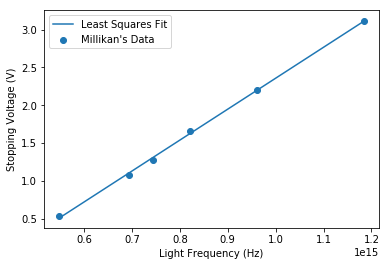

Fit Coefficients:
m =  4.08822735852e-15
c =  -1.73123580398


In [4]:
from numpy import loadtxt
from pylab import scatter, show, plot, xlabel, ylabel

# This is the funciton for calcualting the various E values listed in the text.
# The arguements could be x, y, x**2, or x*y
def E (a):
    average = sum(a)/len(a)
    return average

# This loads the values from the given file and places them into two arrays,
# x and yExp (for the experimental y values)
values = loadtxt("millikan.txt",float)
x = values[: ,0] # First column, in Hertz
yExp = values[: ,1] # Second column in volts

# This cacluates the slope and intercept values of the line of best fit.
m = (E(x*yExp) - E(x)*E(yExp))/(E(x**2) - E(x)**2)
c = (E(x**2)*E(yExp) - E(x)*E(x*yExp))/(E(x**2) - E(x)**2)


# This creates a line of best fit from the slope and intercept calculated above
yLine = m*x + c

# This plots the experimental, and fitted data onto one plot, adds a legend, and labels the axes
scatter(x, yExp, label = "Millikan's Data")
plot(x, yLine, label = "Least Squares Fit")
xlabel("Light Frequency (Hz)")
ylabel("Stopping Voltage (V)")
plt.legend(loc = "best")
show()

# This prints out the slope and y-intercept
print("Fit Coefficients:")
print("m = ", m)
print("c = ", c)

# ADDITION: I did not initially include the calculation of h
q_electron = 1.6E-19  #Coulombs -  fundamental constant of nature
#calculate h by rearranging slope=h/e
h = q_electron * m    
print("Plancks constant is measured as: ",h)

#define the accepted value
h_acc = 6.626069E-34       #Modern Physics - Tipler



The above plot shows the voltage vs frequency data taken by Robert Millikan in his photoelectric effect experiment. The data shows a linear correlation between the two variables. The linear line uses a slope and y-intercept that was calcuated with the least squares method.

In [5]:
# ADDITION: I did not initially include the constant for the fundamental charge, or units.
# This calcualtes the experimental value for planks constant by dividing the
# slope by the elementary charge
q_electron = 1.6E-19  # Fundamental charge in coulombs

plankExp = q_electron * m    
plankAccepted = 6.626e-34
# END ADDITION

print("Plancks constant is measured as: ",plankExp)
print("The accepted value for Plank's constant is: ",plankExp)

# This cacluates and prints the percent difference between the experimental and accepted
# values for planks constant
percentDiff = ((plankAccepted - plankExp) / plankAccepted) * 100
print ("Percent Difference = ", percentDiff, "%")

# ADDITION: I did not initially display the work function
print("The calculated work function is: ",c)
# END ADDITION

Plancks constant is measured as:  6.54116377363e-34
The accepted value for Plank's constant is:  6.54116377363e-34
Percent Difference =  1.28035355225 %
The calculated work function is:  -1.73123580398


## Part 2: Curve Fitting Tutorial:
Open the Jupyter Notebook CurveFit.ipynb and work through the plots and exercises.  It is a very complete set of information that you should remember to consult for this and other classes.  No need to memorize all of the functions.

You may want to read Part 3 (below) and jump back and forth between the tutorial and applying each step to Millikan's data.

### Submit nothing for this section - However this is a dense document - ask a lot of questions and add comments to the document to help you reuse the functions as you go.  
-----------------------------------------------------------------------------------------------

## Part 3: Fitting Millikan's Data 
Use your new found knowledge from the Curve Fitting Tutorial to fit Millikan's Data with the various fitting routines in the tutorial.  Since it is linear data, it is a great test case to get you started.  Try three cases:
    * polynomial fits
    * linear regression (from the mathematical library scipy)
    * curve fits - even though your data fits a straight line, it is worth trying

To distinguish your new fits from those in part 1, give your new fit coefficients names that match the fit type.  For instance, back in Part 1, I named my coefficients ```m``` and ```b```.  In this section, I named my polynomial fit coefficients ```m_poly```, ```b_poly```.

### Your solution to Part 3:
-----------------------------------------------------------------------------------------------

#### Polynomial Fit:

In [7]:
# Fits a (1-dim) linear line to the data, and calculates the covarience
fit, cov = np.polyfit(x, yExp, 1,cov=True)

In [8]:
fit

array([  4.08822736e-15,  -1.73123580e+00])

In [9]:
# Creates slope and y-intercept variables, and sets them equal to the elements of the fit array.
mPoly = fit[0]
cPoly = fit[1]

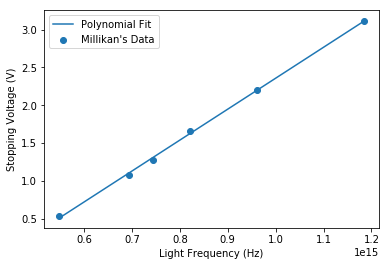

m =  4.08822735852e-15
c =  -1.73123580398


In [10]:
# Creates a linear line based on the slope and y-intercept calculated above
yLinePoly = mPoly * x + cPoly
# PLots millikans data, and the polynomial fit on the same plot, labels the axes, and includes a legend.
scatter(x, yExp, label = "Millikan's Data")
plot(x, yLinePoly, label = "Polynomial Fit")
xlabel("Light Frequency (Hz)")
ylabel("Stopping Voltage (V)")
plt.legend(loc = "best")
show()

# Prints the polynomial slope and y-intercept
print("m = ", mPoly)
print("c = ", cPoly)

This plot shows Millikan's Voltage vs Frequency data, along with a linear line that represents a polynomial fit.

In [11]:
# CORRECTION: I forgot to devide the dm and dc values by the m and c values
# This calculates and prints the range of error in the slope and y-intercept
dm = np.sqrt(cov[0,0])
dc = np.sqrt(cov[1,1])
print("Percent error in m = ", dm/mPoly)
print("Percent error in c = ", dc/cPoly)
# END CORRETCION

Percent error in m =  0.0181749201484
Percent error in c =  -0.0364775188032


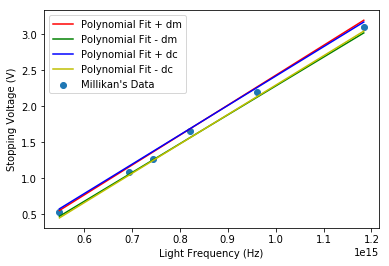

In [12]:
# Plots Millikans data
scatter(x, yExp, label = "Millikan's Data")
# Plots the maximum and minimum of the range of error for the slope
plot(x,(mPoly+dm)*x + c,"r", label = "Polynomial Fit + dm")
plot(x,(mPoly-dm)*x + c,"g", label = "Polynomial Fit - dm")
# Plots the maximum and minimum of the range of error for the y-intercept
plot(x,mPoly*x + c + dc,"b", label = "Polynomial Fit + dc")
plot(x,mPoly*x + c - dc,"y", label = "Polynomial Fit - dc")
# Labels the axes and adds a legend
xlabel("Light Frequency (Hz)")
ylabel("Stopping Voltage (V)")
plt.legend(loc = "best")
show()

This plot is the same as the one before it, except it has four linear lines to represent the upper and lower boundaries of the range of error for the slope and y-intercept. The red line represents the upper boundary for error in the slope, the green line represents the lower boundary for error in the slope, the blue line represents the upper boundary for error in the y-intercept, and the yellow line represents the lower boundary for error in the y-intercept.

#### Linear Regression

In [15]:
from scipy.stats import linregress

In [16]:
# This calculates and prints the linear regression of the data
regresFit = linregress(x,yExp)
regresFit

LinregressResult(slope=4.0882273585175089e-15, intercept=-1.7312358039813545, rvalue=0.9996698358621483, pvalue=1.6349454155977464e-07, stderr=5.2540300677609806e-17)

In [17]:
# Creates slope, y-intercept, and standard deviation variables, and sets them equal to the values calcualted 
# from the linear regression
mLinReg = regresFit[0]
cLinReg = regresFit[1]
# ADDITION
rValue= regresFit[2]
pValue = regresFit[3]
# END ADDITION
stdDev = regresFit[4]

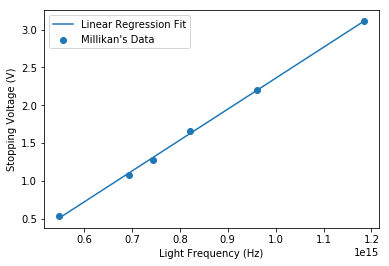

m =  4.08822735852e-15
c =  -1.73123580398
r-value =  0.999669835862
p-value =  0.999669835862
stderr =  5.25403006776e-17


In [18]:
# Creates a linear line based on the slope and y-intercept calculated with linear regression
yLineLinReg = mLinReg * x + cLinReg
# Plots Millikan's data along with the line that preresents the linear regression fit
scatter(x, yExp, label = "Millikan's Data")
plot(x, yLineLinReg, label = "Linear Regression Fit")
xlabel("Light Frequency (Hz)")
ylabel("Stopping Voltage (V)")
plt.legend(loc = "best")
show()

# Prints the slope, y-intercept, and standerd deviaton
print("m = ", mLinReg)
print("c = ", cLinReg)
# ADDITION
print("r-value = ", rValue)
print("p-value = ", rValue)
# END ADDITION
print("stderr = ", stdDev)

This plot shows Millikan's Voltage vs Frequency data, along with a linear line that represents a linear regression fit.

#### Curve Fit

In [19]:
from scipy.optimize import curve_fit

In [20]:
# This function returns the expected fit. In this case, we expect the data to be linear.
def expectedFit(x, a, b):
    return a * x + b

In [21]:
# Uses the curve fit function to calculate a linear fit based on the expected fit function defined above. The curve fit
# function is useful for data that doesnt necessarily follow a linear line
parameters, covariance = curve_fit(expectedFit, x, yExp)
parameters  

array([  4.08822736e-15,  -1.73123580e+00])

In [22]:
# COMMENT: I could've simplified this using the splat operator
# Creates slope and y-intercept, and sets them equal to the values calcualted from the curve fit
mCurve = parameters[0]
cCurve = parameters[1]

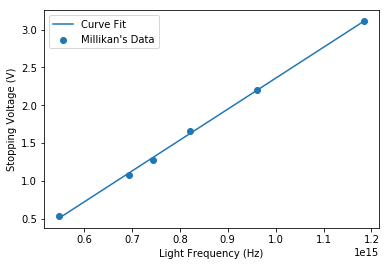

m =  4.08822735807e-15
c =  -1.73123580361


In [24]:
# Creates a linear line based on the slope and y-intercept calculated with the curve fit function
yLineCurve = mCurve * x + cCurve
# Plots Millikan's data along with the line that preresents the curve fit
scatter(x, yExp,label = "Millikan's Data")
plot(x, yLineCurve, label = "Curve Fit")
xlabel("Light Frequency (Hz)")
ylabel("Stopping Voltage (V)")
plt.legend(loc = "best")
show()

# Prints the calculated slope and y-intercept
print("m = ", mCurve)
print("c = ", cCurve)

This plot shows Millikan's Voltage vs Frequency data, along with a linear line that represents a curve fit. The slope and y-intercept values are the same for each of the four different data fitting methods.

Text(0,0.5,'Percent Diff')

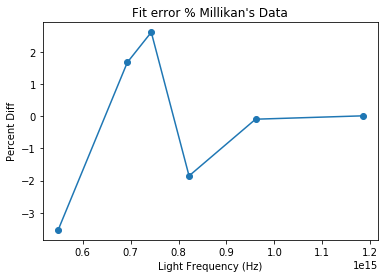

In [30]:
# ADDITION
yfit = expectedFit(x, *parameters)
plt.plot(x,((yfit-yExp)/yExp)*100,"o-")
plt.title("Fit error % Millikan's Data")
plt.xlabel(r"Light Frequency (Hz)")
plt.ylabel(r"Percent Diff")
# END ADDITION

## Part 4: Fitting Projectile Motion Data

1.  Generate some 1D projectile motion data.  You are encouraged to use the function provided in Weekly Session 2. 

2. Add some "noise" to the data with a random variable. Plot the original function (without noise) and the noisy "data" with the scatter() function.  Use some of the tips/tricks on modifying scatter plots that are linked in Weekly Session 2.
3. Note that you have two plots to make - $x$ vs. $t$ and $v$ vs. $t$. Use this [link](https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py) to learn how to make subplots.

4. Perform a curve fit to your noisy "data" and anaylze the error in the fit (i.e. the difference between the fit result and the original (noiseless) function. Compare the fit parameters to your original parameters using the standard deviation in the fit parameters. How close does the fit get to your original parameters? Repeat the analysis to generate new random data and compare again.

### Your solution to Part 4:
-----------------------------------------------------------------------------------------------

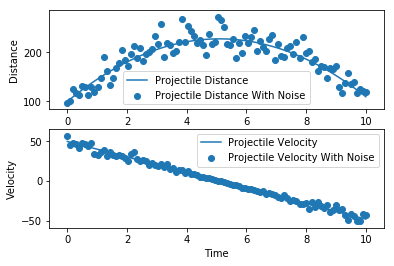

In [31]:
from numpy import linspace
# Creates a function that calculates the position and valocity of a projectile, given a time and an acceleration. The starting
# velocity is set to 50, and the starting position is set to zero.
def position(t, a, v_i=50, x_i=100):
    x=x_i+v_i*t+0.5*a*t**2
    v=v_i+a*t
    return x,v

# Creates a 1D array that represents 10 seconds of time
time = linspace(0, 10, 100)
# Uses the positon function to calcualte distance and velocity based on time
distance, velocity = position(time, -9.81) 
# Adds noise to the projectile function using random variation
distanceNoise = distance * (1.0 + 0.1*np.random.normal(size = len(time)))
velocityNoise = velocity * (1.0 + 0.1*np.random.normal(size = len(time)))

# Creates the first subplot that shows position vs time. Plots both the caluclated data, and scatter plot of the
# noisy data. Inclues and legend and axis labels.
plt.subplot(2,1,1)
plot(time,distance,label = "Projectile Distance")
scatter(time,distanceNoise,label = "Projectile Distance With Noise")
xlabel("Time")
ylabel("Distance")
plt.legend(loc = "best")

# Creates the first subplot that shows velociy vs time. Plots both the caluclated data, and scatter plot of the
# noisy data. Inclues and legend and axis labels.
plt.subplot(2,1,2)
plot(time,velocity,label = "Projectile Velocity")
scatter(time,velocityNoise,label = "Projectile Velocity With Noise")
xlabel("Time")
ylabel("Velocity")
plt.legend(loc = "best")

These plots represent the motion of a projectile with initial position 100m, initial upward velocity 50m/s, and acceleration -9.81m/s^2. The plot in the top shows the disnace verses time, and the plot on the bottom shows the velocity verses time. The solid line represents the values that were calculated with a projectile motion function, and the scatter plots represent this same data after random noise has been added to it.

[ -5.04933075  51.59814309  99.57237254] [ -9.69819985  49.53275587]


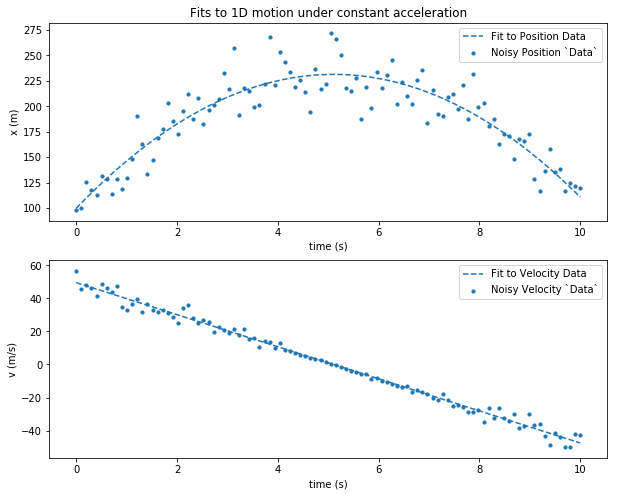

In [37]:
# Defines functions for the expected curve fit of the valocity and position data.
def expectedDistance(x, a, b, c):
    return a * x**2  + b * x + c
def expectedVelocity(x, a, b):
    return a * x + b

# Calculates the fitted perameters of the noisy data using the curve fit function
pDistance, covariance = curve_fit(expectedDistance, time, distanceNoise)
pVelocity, covariance = curve_fit(expectedVelocity, time, velocityNoise)

# CORRECTION: I did not produce a graph using the fits
distanceFit = expectedDistance(time, *pDistance) 
velocityFit = expectedVelocity(time, *pVelocity)  
# the splat operator unpacks an array into function arguments

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(time, distanceFit, '--',label="Fit to Position Data")
plt.scatter(time, distanceNoise, s=10,label="Noisy Position `Data`")
plt.legend()

plt.title('Fits to 1D motion under constant acceleration')
plt.xlabel('time (s)')
plt.ylabel('x (m)')

plt.subplot(2, 1, 2)
plt.plot(time, velocityFit, '--',label="Fit to Velocity Data")
plt.scatter(time, velocityNoise, s=10,label="Noisy Velocity `Data`")

plt.xlabel('time (s)')
plt.ylabel('v (m/s)')
plt.legend()
# END CORRECTION

print(pDistance, pVelocity)

In these plots, the scattered data is the position and velocity data with noise added to it, and the dashed lines are the curve fits.

In [38]:
# Creates and prints variables that represent the expected and fitted data.
expected_xi = 100
expected_vi = 50
expected_a = -9.81
calculated_xi = pDistance[2]
calculated_vi1 = pDistance[1]
calculated_vi2 = pVelocity[1]
calculated_a1 = pDistance[0]*2
calculated_a2 = pVelocity[0]
# CORRECTION: changed the formatting to make it clearer
print("Expected starting position: ", expected_xi)
print("Expected starting velocity: ", expected_vi)
print("Expected acceleration: ", expected_a)
print("Calculated starting position from x-fit: ", calculated_xi)
print("Calculated starting velocity from x-fit: ", calculated_vi1)
print("Calculated acceleration from x-fit: ", calculated_a1)
print("Calculated starting velocity from v-fit: ", calculated_vi2)
print("Calculated acceleration from v-fit: ", calculated_a2)
# END CORRECTION

Expected starting position:  100
Expected starting velocity:  50
Expected acceleration:  -9.81
Calculated starting position from x-fit:  99.5723725361
Calculated starting velocity from x-fit:  51.5981430948
Calculated acceleration from x-fit:  -10.0986615004
Calculated starting velocity from v-fit:  49.5327558699
Calculated acceleration from v-fit:  -9.69819984745


In [40]:
# Creates a function that calculates error given expected and calculated values
def error(expected,calculated):
    diff = abs((expected-calculated) / expected) * 100
    return diff

# CORRECTION: Changed formatting to make it clearer
# Calculates and prints the percent error in the initial position, initial velocity, and acceleration using the error function
print("Percent error in position: ", error(expected_xi,calculated_xi),"%")
print("Percent error in velocity from x-fit: ", error(expected_vi,calculated_vi1),"%")
print("Percent error in acceleration from x-fit: ", error(expected_a,calculated_a1),"%")
print("Percent error in velocity from v-fit: ", error(expected_vi,calculated_vi2),"%")
print("Percent error in acceleration from v-fit: ", error(expected_a,calculated_a2),"%")
# END CORRECTION

Percent error in position:  0.427627463872 %
Percent error in velocity from x-fit:  3.19628618965 %
Percent error in acceleration from x-fit:  2.94252293992 %
Percent error in velocity from v-fit:  0.934488260119 %
Percent error in acceleration from v-fit:  1.13965496996 %


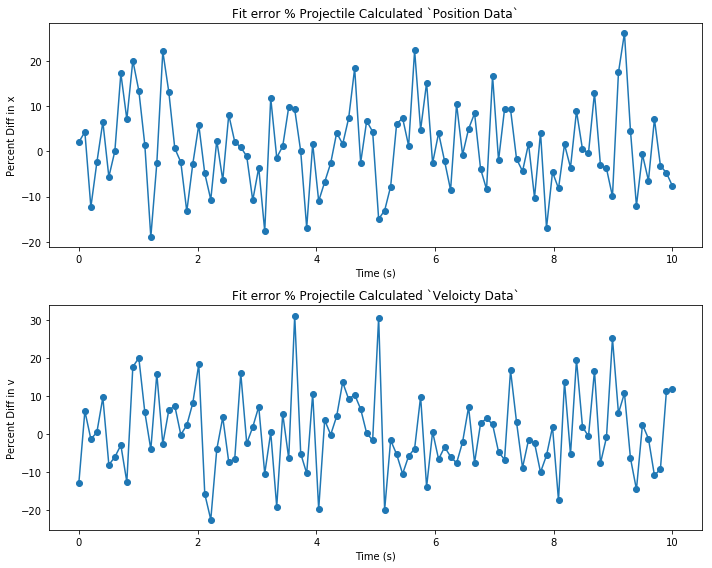

In [43]:
# ADDITION
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(time,((distanceFit-distanceNoise)/distanceNoise)*100,"o-")
plt.title("Fit error % Projectile Calculated `Position Data`")
plt.xlabel(r"Time (s)")
plt.ylabel(r"Percent Diff in x")

plt.subplot(2, 1, 2)
plt.plot(time,((velocityFit-velocityNoise)/velocityNoise)*100,"o-")
plt.title("Fit error % Projectile Calculated `Veloicty Data`")
plt.xlabel(r"Time (s)")
plt.ylabel(r"Percent Diff in v")
plt.tight_layout()
# END ADDITION

The above plots show the percent arror in each point that had random noise added to it. The error centers around zero, and is around 10% on average. This is expected because of the way we defined noise.

## Post lab questions

Describe briefly Millikan's experiment in your own words.  Be sure to explain these two main points.

1.  What is $\nu$, and why is it the independent variable in the experiment?  Did Millikan use $\nu$ in the           visible, infrared, or ultraviolet spectrum?  Here is a [reference](http://hyperphysics.phy-astr.gsu.edu/hbase/ems3.html) for light energies.
    
2.  What does $V$ measure, and why is it the dependent variable in the experiment?  
-----------------------------------------------------------------------------------------------

Using the photoelectric effect, Millikan provided data that supported Einstein's equation: V = (h/e) * _v_ - p, and he calculated the value of plank's constant (h). To accomplish this, Millikan shined light of various frequencies onto metal in a vaccum chamber. To get accurate data, he used a sharp knife to clean the surface of the metal before taking measurements, and he measured the kinetic energy of the electrons by relating it to the stopping potential, or the voltage required to stop electrons from flowing out of the metal. In Einstein's equation, V is the stopping potential, e is the elementary charge, _v_ is the frequency of the light, and p is the work function, or the energy it takes to remove electrons from the surface of a metal.   
_v_ is the independent variable, because light frequency is measurable, conveinient to manipulate, and it is directly proportional to energy. This energy from the photons is transferred to the energy of the electrons. The energy of the electrons has an effect on the stopping potential, and this is why V is the dependent variable. Millikan chose to measure voltage, because it is easier than directly measuring the energy of the free electrons.   
Based on the data above, Millikan used infared light.

## With any remaining time 

* Play with "tricking out" your plots using the matplotlib gallery - which is one of my favorite places on the interwebs. Click on the [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py) and use it as a guide to modify your scatter plot.  Once you're done with that, play with the markers as well - you can change their shape! [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py)

* Work on HW6 - which includes finishing all of the exercises in Weekly Session 2